In [0]:
from google.colab import files
uploaded = files.upload()

Saving heat_island.csv to heat_island.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

In [0]:
df = pd.read_csv('heat_island.csv', encoding = "ISO-8859-1")
df = df.drop('NewCityID', axis=1)
df = df.drop('UrbanID', axis=1)
original_df = df;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31500 entries, 0 to 31499
Data columns (total 15 columns):
Country                31500 non-null object
Name                   31500 non-null object
NameFixed              31500 non-null object
Pop1990                31500 non-null int64
Pop1995                31500 non-null float64
Pop2000                31500 non-null int64
CityArea               31500 non-null float64
CityTempDay            31492 non-null float64
BufferTempDay          31500 non-null float64
CityBufferDiffDay      31492 non-null float64
CityTempNight          31434 non-null float64
BufferTempNight        31496 non-null float64
CityBufferDiffNight    31434 non-null float64
Latitude               31500 non-null float64
Longitude              31500 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 3.6+ MB


In [0]:
cols = ['CityTempDay', 'CityBufferDiffDay', 'CityTempNight', 'BufferTempNight', 'CityBufferDiffNight'] 
df[cols] = df[cols].fillna(df.mean().iloc[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31500 entries, 0 to 31499
Data columns (total 15 columns):
Country                31500 non-null object
Name                   31500 non-null object
NameFixed              31500 non-null object
Pop1990                31500 non-null int64
Pop1995                31500 non-null float64
Pop2000                31500 non-null int64
CityArea               31500 non-null float64
CityTempDay            31500 non-null float64
BufferTempDay          31500 non-null float64
CityBufferDiffDay      31500 non-null float64
CityTempNight          31500 non-null float64
BufferTempNight        31500 non-null float64
CityBufferDiffNight    31500 non-null float64
Latitude               31500 non-null float64
Longitude              31500 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 3.6+ MB


In [0]:
df['CityBufferAvg'] = (df['CityBufferDiffDay'] + df['CityBufferDiffNight'])/2

In [0]:
df_day = df.drop(columns=['Name', 'NameFixed', 'BufferTempDay', 'BufferTempNight', 'CityBufferDiffNight', 'CityBufferAvg'])
corr_matrix = df_day.corr()
corr_matrix['CityBufferDiffDay'].sort_values(ascending=False)

CityBufferDiffDay    1.000000
CityTempDay          0.999979
CityTempNight       -0.000706
Longitude           -0.001415
Pop1990             -0.001593
Pop1995             -0.001656
Pop2000             -0.001707
CityArea            -0.003176
Latitude            -0.015274
Name: CityBufferDiffDay, dtype: float64

In [0]:
df_night = df.drop(columns=['Name', 'NameFixed', 'BufferTempDay', 'BufferTempNight', 'CityBufferDiffDay', 'CityBufferAvg'])
corr_matrix = df_night.corr()
corr_matrix['CityBufferDiffNight'].sort_values(ascending=False)

CityBufferDiffNight    1.000000
CityTempNight          0.999998
Longitude              0.015287
CityTempDay           -0.000980
Pop2000               -0.003124
Pop1995               -0.003213
Pop1990               -0.003250
CityArea              -0.007591
Latitude              -0.064255
Name: CityBufferDiffNight, dtype: float64

In [0]:
df.max().to_frame().T

,Country,Name,NameFixed,Pop1990,Pop1995,Pop2000,CityArea,CityTempDay,BufferTempDay,CityBufferDiffDay,CityTempNight,BufferTempNight,CityBufferDiffNight,Latitude,Longitude,CityBufferAvg
0,ZWE,ÃzÃ¼mlÃ¼,ZYWIEC,75437921,7.70475e+07,78582895,43605.8,71260.8,62.61,71260.8,71260.8,71260.8,71260.8,78.2018,179.362,35633.2


In [0]:
df.min().to_frame().T

,Country,Name,NameFixed,Pop1990,Pop1995,Pop2000,CityArea,CityTempDay,BufferTempDay,CityBufferDiffDay,CityTempNight,BufferTempNight,CityBufferDiffNight,Latitude,Longitude,CityBufferAvg
0,ABW,,25DEMAYO,0,26.7778,0,0,2.26,7.95,-30.91,-16.22,-10.86,-19.82,-54.804,-176.172,-15.54


In [0]:
df['CityBufferDiffDay'].nsmallest(10)

25344   -30.91
13877   -26.34
13484   -24.24
14041   -22.36
13623   -19.84
13443   -19.31
25385   -18.66
25126   -18.16
13441   -16.95
14222   -16.87
Name: CityBufferDiffDay, dtype: float64

In [0]:
smalldayoutliers = df.loc[(df['CityBufferDiffDay'] <= -16.87)]
data = df.loc[(df['CityBufferDiffDay'] > -16.87)]
df['CityBufferDiffDay'].nlargest(10)

14493    71260.840667
15924    71260.840667
16662    71260.840667
21311    71260.840667
21480    71260.840667
21728    71260.840667
21921    71260.840667
22546    71260.840667
15769       16.710000
27564       15.510000
Name: CityBufferDiffDay, dtype: float64

In [0]:
largedayoutliers = df.loc[(df['CityBufferDiffDay'] >= 10.99)]
data = data.loc[(data['CityBufferDiffDay'] < 10.99)]
df['CityBufferDiffNight'].nsmallest(10)

21434   -19.82
24660   -16.37
30960   -15.90
13425   -15.01
13466   -14.81
24523   -13.88
31256   -13.25
23973   -12.81
30753   -12.39
20657   -12.19
Name: CityBufferDiffNight, dtype: float64

In [0]:
smallnightoutliers = df.loc[(df['CityBufferDiffNight'] <= -12.19)]
data = data.loc[(data['CityBufferDiffNight'] > -12.19)]
df['CityBufferDiffNight'].nlargest(10)

17463    71260.840667
17611    71260.840667
17614    71260.840667
17645    71260.840667
17929    71260.840667
17941    71260.840667
17968    71260.840667
17985    71260.840667
17995    71260.840667
18035    71260.840667
Name: CityBufferDiffNight, dtype: float64

In [0]:
largenightoutliers = df.loc[(df['CityBufferDiffNight'] >= 9.54)]
data = data.loc[(data['CityBufferDiffNight'] < 9.54)]
largedayoutliers = largedayoutliers[['Country', 'Name', 'CityBufferDiffDay']]
largedayoutliers.sort_values('CityBufferDiffDay', ascending=False).head(10)

,Country,Name,CityBufferDiffDay
21921,PER,MORROPON,71260.840667
14493,MEX,Villa Adolpho Lopez Mateos,71260.840667
15924,BLZ,San Pedro,71260.840667
16662,KHM,Pouthisat,71260.840667
22546,CIV,Grand-Lahou,71260.840667
21311,PER,TAMARINDO,71260.840667
21480,KIR,Utiroa,71260.840667
21728,KIR,Ijaki,71260.840667
15769,IND,JAMKHED,16.710000
27564,IND,HEGGADDEVANKOTE,15.510000


In [0]:
smalldayoutliers = smalldayoutliers[['Country', 'Name', 'CityBufferDiffDay']]
smalldayoutliers.sort_values('CityBufferDiffDay', ascending=True).head(10)

,Country,Name,CityBufferDiffDay
25344,IND,BESWAN,-30.91
13877,NPL,Bhadrapur,-26.34
13484,IND,TIJARA,-24.24
14041,IND,INDERGARH,-22.36
13623,IND,REENGUS,-19.84
13443,IND,ATELI,-19.31
25385,IND,PURDILNAGAR,-18.66
25126,IND,KUNWARGAON,-18.16
13441,IND,DUNGARGARH,-16.95
14222,IND,RANIPUR,-16.87


In [0]:
largenightoutliers = largenightoutliers[['Country', 'Name', 'CityBufferDiffNight']]
largenightoutliers.sort_values('CityBufferDiffNight', ascending=False).head(10)

,Country,Name,CityBufferDiffNight
22367,IDN,Pringsewu,71260.840667
23321,IDN,Babat,71260.840667
23901,CMR,,71260.840667
23754,COD,Dekese,71260.840667
23680,CMR,,71260.840667
23572,IDN,Ngoro,71260.840667
23477,IDN,Sidareja,71260.840667
23347,IDN,Margasari,71260.840667
23293,IDN,Randudongkal,71260.840667
20716,PNG,Ambunti,71260.840667


In [0]:
smallnightoutliers = smallnightoutliers[['Country', 'Name', 'CityBufferDiffNight']]
smallnightoutliers.sort_values('CityBufferDiffNight', ascending=True).head(10)

,Country,Name,CityBufferDiffNight
21434,NPL,Kapilbastu,-19.82
24660,ETH,,-16.37
30960,CHN,Laochang,-15.90
13425,IND,FARIDPUR,-15.01
13466,IND,DATAGANJ,-14.81
24523,IND,BAHSUMA,-13.88
31256,CHN,Boshang,-13.25
23973,ETH,,-12.81
30753,CHN,Sayingpan,-12.39
20657,BTN,Punakha,-12.19


In [0]:
averageoutliers = df[['Country', 'Name', 'CityBufferAvg']]
averageoutliers.sort_values('CityBufferAvg', ascending=False).head(10)

,Country,Name,CityBufferAvg
20695,AGO,UÃ­ge,35633.150333
18374,TZA,Tunduma,35632.860333
20468,AGO,Mbanza Congo,35632.685333
21034,ZMB,,35632.415333
17941,ECU,Jipijapa,35632.255333
23680,CMR,,35631.985333
18035,IDN,Curup,35631.830333
18318,IDN,Tulungagung,35631.780333
18285,IDN,Kebumen,35631.535333
25315,COL,MAGUI,35631.505333


In [0]:
averageoutliers.sort_values('CityBufferAvg', ascending=True).head(10)

,Country,Name,CityBufferAvg
25344,IND,BESWAN,-15.540
13877,NPL,Bhadrapur,-14.990
13484,IND,TIJARA,-12.545
21434,NPL,Kapilbastu,-11.780
14041,IND,INDERGARH,-11.240
31256,CHN,Boshang,-10.285
13623,IND,REENGUS,-9.885
13443,IND,ATELI,-9.835
24660,ETH,,-9.700
30960,CHN,Laochang,-9.675


# Data Visualization

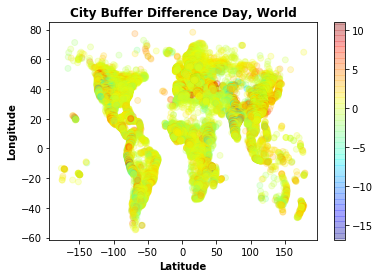

In [0]:
# Map of entire world, excluding major outliers in order to show more color differentiation
maxdiff = 10.99
mindiff = -16.87
plt.scatter(x=data["Longitude"], y=data["Latitude"], c=data["CityBufferDiffDay"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Day, World', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

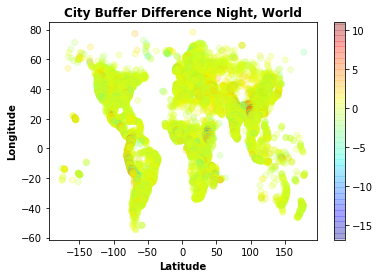

In [0]:
# Same color scale is kept in both day and night world overviews
plt.scatter(x=data["Longitude"], y=data["Latitude"], c=data["CityBufferDiffNight"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Night, World', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

In [0]:
USA = data.loc[df['Country'] == 'USA']
USA['CityBufferDiffDay'].nlargest(5)

8028    9.13
3500    8.69
8333    8.37
5050    8.09
9809    7.93
Name: CityBufferDiffDay, dtype: float64

In [0]:
USA['CityBufferDiffDay'].nsmallest(5)

3888    -9.43
5827    -8.92
6754    -8.59
24834   -7.94
5335    -7.85
Name: CityBufferDiffDay, dtype: float64

In [0]:
USA['CityBufferDiffNight'].nlargest(5)

8623    6.65
7296    4.90
9143    4.90
602     4.06
8797    3.69
Name: CityBufferDiffNight, dtype: float64

In [0]:
USA['CityBufferDiffNight'].nsmallest(5)

10467   -4.88
8425    -4.32
4912    -3.57
25908   -3.54
9062    -3.44
Name: CityBufferDiffNight, dtype: float64

In [0]:
mindiff = -9.43
maxdiff = 9.13

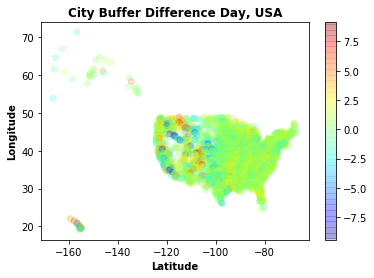

In [0]:
plt.scatter(x=USA["Longitude"], y=USA["Latitude"], c=USA["CityBufferDiffDay"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Day, USA', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

In [0]:
USA_small = USA.loc[(USA['Latitude'] >= 21) & (USA['Latitude'] <= 50)]
USA_small = USA_small.loc[(USA_small['Longitude'] >= -130)]

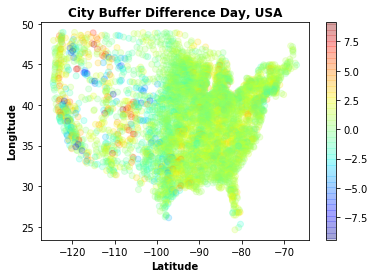

In [0]:
# United States City - Buffer during the day
plt.scatter(x=USA_small["Longitude"], y=USA_small["Latitude"], c=USA_small["CityBufferDiffDay"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Day, USA', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

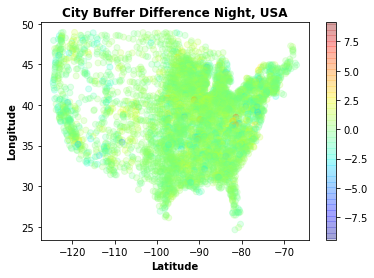

In [0]:
# United States City - Buffer average during the night
plt.scatter(x=USA_small["Longitude"], y=USA_small["Latitude"], c=USA_small["CityBufferDiffNight"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Night, USA', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

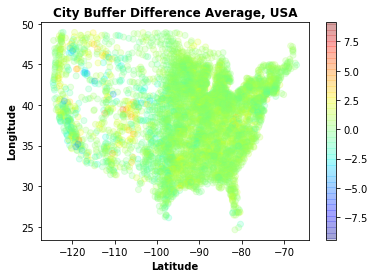

In [0]:
# United States city - buffer averaged between day and night

plt.scatter(x=USA_small["Longitude"], y=USA_small["Latitude"], c=USA_small["CityBufferAvg"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Average, USA', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

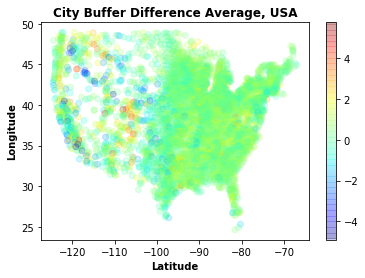

In [0]:
# Changed color bar to see more difference
plt.scatter(x=USA_small["Longitude"], y=USA_small["Latitude"], c=USA_small["CityBufferAvg"], cmap = 'jet', alpha=0.2)
cbar = plt.colorbar()
# plt.clim(mindiff, maxdiff)
plt.title('City Buffer Difference Average, USA', size=12, weight='bold')
plt.xlabel('Latitude', size=10, weight='bold')
plt.ylabel('Longitude', size=10, weight='bold')
plt.show()

In [0]:
averages = USA.sort_values('CityBufferDiffDay', ascending=True)
averages = averages[['Country', 'Name', 'CityBufferDiffDay']]
averages.head()

,Country,Name,CityBufferDiffDay
3888,USA,Desert Aire,-9.43
5827,USA,Gooding,-8.92
6754,USA,Lyman,-8.59
24834,USA,Shingletown,-7.94
5335,USA,Emmett,-7.85


In [0]:
averages = USA.sort_values('CityBufferDiffNight', ascending=True)
averages = averages[['Country', 'Name', 'CityBufferDiffNight']]
averages.head()

,Country,Name,CityBufferDiffNight
10467,USA,Thoreau,-4.88
8425,USA,Easton,-4.32
4912,USA,Pulaski,-3.57
25908,USA,Bear Valley Springs,-3.54
9062,USA,Alderson,-3.44


In [0]:
# Outliers, high is greater than 2.5 degrees C city/buffer difference
USA_high = USA_small.loc[(USA_small['CityBufferDiffNight'] >= 2.5)]
USA_low = USA_small.loc[(USA_small['CityBufferDiffNight'] < 2.5)]
USA_high = USA_high.sort_values('CityBufferDiffNight', ascending=False)
USA_high.head()

,Country,Name,NameFixed,Pop1990,Pop1995,Pop2000,CityArea,CityTempDay,BufferTempDay,CityBufferDiffDay,CityTempNight,BufferTempNight,CityBufferDiffNight,Latitude,Longitude,CityBufferAvg
8623,USA,Clendenin,CLENDENIN,1203,1159.0,1116,28.90,27.60,27.37,0.23,22.06,15.41,6.65,38.487054,-81.344675,3.440
7296,USA,Dallas,DALLAS,1037,1046.0,1055,9.82,31.56,32.39,-0.84,18.38,13.48,4.90,40.632225,-91.161205,2.030
9143,USA,Mullens,MULLENS,2006,1884.0,1769,32.66,26.76,26.15,0.61,17.29,12.39,4.90,37.580884,-81.373789,2.755
8797,USA,Baldwin,BALDWIN,426,1243.0,3627,35.02,32.94,32.09,0.85,17.62,13.93,3.69,38.205719,-89.826331,2.270
10277,USA,Caraway,CARAWAY,1178,1261.0,1349,1.78,32.52,34.34,-1.82,20.42,16.85,3.57,35.766938,-90.325485,0.875


In [0]:
USA_high.shape

(20, 16)

In [0]:
df['Country'].value_counts().nlargest(10)

CHN    6488
USA    5041
IND    2850
HUN     915
ARG     882
BRA     651
ROU     633
DEU     599
CAN     582
COL     558
Name: Country, dtype: int64

In [0]:
large_cities = df.loc[(df['Pop2000'] >= 50000)]
country_groups_day = large_cities.groupby('Country').mean().sort_values('CityBufferDiffDay', ascending=False)
country_groups_day.head(10)

,Pop1990,Pop1995,Pop2000,CityArea,CityTempDay,BufferTempDay,CityBufferDiffDay,CityTempNight,BufferTempNight,CityBufferDiffNight,Latitude,Longitude,CityBufferAvg
Country,,,,,,,,,,,,,
MLT,328232.0,346434.0,368591.0,241.180,43.280,35.430,7.850,20.980,21.910,-0.930,35.887647,14.442328,3.460
ANT,43550.0,51788.0,61584.0,361.220,37.920,32.290,5.640,23.520,23.400,0.120,12.177029,-68.961230,2.880
TWN,2939424.8,3058671.6,3194591.6,2470.194,34.818,29.894,4.924,22.442,20.598,1.842,23.774845,120.939175,3.383
JEY,82826.0,84749.0,86767.0,112.990,30.050,25.310,4.750,12.760,13.630,-0.870,49.217799,-2.131890,1.940
BHR,298750.0,334531.0,375025.0,585.580,49.470,45.120,4.350,26.210,26.930,-0.720,26.074271,50.551289,1.815
REU,572520.0,628841.0,691647.0,1036.430,32.480,28.450,4.030,19.210,16.000,3.200,-21.078808,55.470383,3.615
WSM,48921.0,52041.0,55640.0,84.750,30.070,26.060,4.010,21.970,20.480,1.490,-13.852206,-171.769312,2.750
GNQ,47021.0,59253.0,66755.0,36.950,31.300,27.440,3.860,20.370,20.140,0.230,2.795320,9.283987,2.045
PYF,90723.0,98759.0,107915.0,216.600,31.540,27.780,3.750,21.190,20.130,1.060,-17.590879,-149.545646,2.405


In [0]:
country_groups_night = large_cities.groupby('Country').mean().sort_values('CityBufferDiffNight', ascending=False)
country_groups_night.head(10)

,Pop1990,Pop1995,Pop2000,CityArea,CityTempDay,BufferTempDay,CityBufferDiffDay,CityTempNight,BufferTempNight,CityBufferDiffNight,Latitude,Longitude,CityBufferAvg
Country,,,,,,,,,,,,,
ZMB,1.929303e+05,2.072786e+05,2.176285e+05,258.411818,33.804545,31.674545,2.131818,6495.014606,18.080909,6478.515515,-13.449657,28.695699,3240.323667
IDN,2.660116e+05,3.335046e+05,4.212340e+05,187.415210,30.905629,29.701856,1.203054,5140.465497,447.759525,5120.694000,-4.495014,110.913506,2560.948527
AGO,2.214594e+05,3.069384e+05,3.917534e+05,90.263125,39.339375,38.801250,0.537500,4469.190667,16.230000,4454.188167,-11.342624,14.575773,2227.362833
SDN,1.785885e+05,2.365279e+05,3.056055e+05,130.412857,45.509048,45.280714,0.227381,1717.050968,20.304048,1697.167873,12.275280,31.221453,848.697627
NGA,2.141265e+05,2.771823e+05,3.487441e+05,124.176855,31.108226,30.010000,1.097823,594.866457,20.092823,574.949844,7.989868,6.900666,288.023833
TLS,5.689200e+04,7.080400e+04,6.530000e+04,128.850000,29.640000,28.260000,1.380000,24.280000,20.990000,3.290000,-8.592352,125.572121,2.335000
REU,5.725200e+05,6.288410e+05,6.916470e+05,1036.430000,32.480000,28.450000,4.030000,19.210000,16.000000,3.200000,-21.078808,55.470383,3.615000
COM,4.518900e+04,5.463850e+04,6.607400e+04,43.400000,31.795000,31.310000,0.485000,22.175000,19.505000,2.675000,-11.929949,43.842793,1.580000
TWN,2.939425e+06,3.058672e+06,3.194592e+06,2470.194000,34.818000,29.894000,4.924000,22.442000,20.598000,1.842000,23.774845,120.939175,3.383000


# Predicting a city's city-buffer average difference based on population, city size, city location, and city temperatures during the day and night

Day first

In [0]:
df_day = pd.get_dummies(df_day, columns=['Country'])
df_day.head()

,Pop1990,Pop1995,Pop2000,CityArea,CityTempDay,CityBufferDiffDay,CityTempNight,Latitude,Longitude,Country_ABW,Country_AFG,Country_AGO,Country_AIA,Country_ALB,Country_AND,Country_ANT,Country_ARE,Country_ARG,Country_ARM,Country_ASM,Country_ATG,Country_AUS,Country_AUT,Country_AZE,Country_BDI,Country_BEL,Country_BEN,Country_BFA,Country_BGD,Country_BGR,Country_BHR,Country_BHS,Country_BIH,Country_BLR,Country_BLZ,Country_BMU,Country_BOL,Country_BRA,Country_BRB,Country_BRN,...,Country_SPM,Country_STP,Country_SUR,Country_SVK,Country_SVN,Country_SWE,Country_SWZ,Country_SYC,Country_SYR,Country_TCA,Country_TCD,Country_TGO,Country_THA,Country_TJK,Country_TKM,Country_TLS,Country_TON,Country_TTO,Country_TUN,Country_TUR,Country_TWN,Country_TZA,Country_UGA,Country_UKR,Country_URY,Country_USA,Country_UZB,Country_VAT,Country_VCT,Country_VEN,Country_VGB,Country_VIR,Country_VNM,Country_VUT,Country_WLF,Country_WSM,Country_YEM,Country_ZAF,Country_ZMB,Country_ZWE
0,918,1015.0,1123,4.93,7.05,-0.90,-3.16,72.788598,-56.140056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3469,3986.0,4581,152.21,10.65,-1.76,-0.45,71.303963,-156.730206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2237,2356.0,2510,47.58,16.66,2.13,5.43,71.004989,25.962568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1285,1235.0,1163,19.44,14.61,-0.26,5.61,70.983068,24.652803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1159,1115.0,1049,35.16,20.33,2.09,4.57,70.943870,27.356392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# from sklearn.model_selection import train_test_split
# 
# train, test = train_test_split(df_day, test_size=0.2)
# train_X = train.drop('CityBufferDiffDay', axis=1)
# train_y = train['CityBufferDiffDay']
# test_X = test.drop('CityBufferDiffDay', axis=1)
# test_y = test['CityBufferDiffDay']

X_day = df_day.drop('CityBufferDiffDay', axis=1)
y_day = df_day['CityBufferDiffDay']

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_day, y_day)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
X_sample = X_day.iloc[:5]
y_sample = y_day.iloc[:5]
print("Predictions: ", forest_reg.predict(X_sample))

Predictions:  [ 0.222 -0.963  1.899 -0.025  1.89 ]


In [0]:
print("Actual: ", list(y_sample))

Actual:  [-0.9, -1.76, 2.13, -0.26, 2.09]


In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np

forest_scores = cross_val_score(forest_reg, X_day, y_day,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [0]:
display_scores(forest_rmse_scores)

Scores: [1.28021015 1.50710829 1.67676793 1.5092468  2.2459952  2.02660522
 1.71072919 1.67672836 1.93396474 1.47576508]
Mean: 1.7043120975092023
Standard deviation: 0.27579530780561207


Off by 1.7 degrees C, not terrible, but could be better

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
#     Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 10], 'max_features': [2,4,6,8]},
#     Then try 6 (2x3) combinations with bootstrap set as false
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_day, y_day)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 10], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

669.183712714057 {'max_features': 2, 'n_estimators': 3}
747.9396832658718 {'max_features': 2, 'n_estimators': 10}
747.9396832658718 {'max_features': 2, 'n_estimators': 10}
1159.0693366842524 {'max_features': 4, 'n_estimators': 3}
1022.8521279392136 {'max_features': 4, 'n_estimators': 10}
1022.8521279392136 {'max_features': 4, 'n_estimators': 10}
1019.2579629015315 {'max_features': 6, 'n_estimators': 3}
827.7243234535107 {'max_features': 6, 'n_estimators': 10}
827.7243234535107 {'max_features': 6, 'n_estimators': 10}
983.4809682607291 {'max_features': 8, 'n_estimators': 3}
859.2617204150213 {'max_features': 8, 'n_estimators': 10}
859.2617204150213 {'max_features': 8, 'n_estimators': 10}
1151.285013110781 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
786.7904840322954 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
757.0864894615736 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
596.8864417810884 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [0]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [0]:
forest_best = grid_search.best_estimator_
forest_best.fit(X_day, y_day)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [0]:
forest_best = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, min_impurity_decrease=0.0, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

forest_best.fit(X_day, y_day)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [0]:
forest_scores2 = cross_val_score(forest_best, X_day, y_day,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores2 = np.sqrt(-forest_scores2)

In [0]:
display_scores(forest_rmse_scores2)

Scores: [3.35931525e+02 1.27031456e+02 1.69181811e+00 1.55674852e+00
 9.41624403e+02 1.33766981e+03 1.96285905e+03 9.24324040e+02
 2.22523032e+00 1.26980954e+02]
Mean: 576.1895042119475
Standard deviation: 648.7207085312191


# Best forest didnt work, need to fix

Back to the original random forest regressor!